In [1]:
import xinfer
model = xinfer.create_model("ultralytics/yolov8s-seg", device="cuda", dtype="bfloat16")

2024-11-09 00:07:07.244 | INFO     | xinfer.models:__init__:63 - Model: ultralytics/yolov8s-seg
2024-11-09 00:07:07.245 | INFO     | xinfer.models:__init__:64 - Device: cuda
2024-11-09 00:07:07.245 | INFO     | xinfer.models:__init__:65 - Dtype: bfloat16


In [2]:
from ultralytics import YOLO
model = YOLO("yolov8n-seg.pt")
results = model.predict("/home/dnth/Desktop/xinfer/tests/test_data/test_image_2.jpg")

In [3]:
result = model.infer("/home/dnth/Desktop/xinfer/tests/test_data/test_image_1.jpg")
result


0: 640x480 2 persons, 16 cars, 1 truck, 79.8ms
Speed: 2.1ms preprocess, 79.8ms inference, 77.1ms postprocess per image at shape (1, 3, 640, 480)


Result(categories=None, boxes=[Box(x1=616.0, y1=397.20001220703125, x2=699.2000122070312, y2=462.0, score=0.9091796875, label='car'), Box(x1=0.6000000238418579, y1=390.6000061035156, x2=234.0, y2=502.3999938964844, score=0.90283203125, label='car'), Box(x1=390.8000183105469, y1=378.0, x2=535.6000366210938, y2=539.6000366210938, score=0.88623046875, label='car'), Box(x1=0.0, y1=420.0, x2=166.40000915527344, y2=519.2000122070312, score=0.873046875, label='car'), Box(x1=0.15000000596046448, y1=438.0, x2=67.0999984741211, y2=528.4000244140625, score=0.75048828125, label='car'), Box(x1=717.6000366210938, y1=376.0, x2=767.2000122070312, y2=432.0, score=0.6689453125, label='car'), Box(x1=139.40000915527344, y1=399.6000061035156, x2=287.8000183105469, y2=490.0, score=0.65673828125, label='car'), Box(x1=598.7999877929688, y1=370.8000183105469, x2=634.0, y2=397.20001220703125, score=0.64404296875, label='car'), Box(x1=648.0, y1=366.3999938964844, x2=673.6000366210938, y2=388.8000183105469, score

In [6]:
len(result.boxes)

19

In [7]:
len(result.masks)

19

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load the original image
img_path = "/home/dnth/Desktop/xinfer/tests/test_data/test_image_1.jpg"
image = Image.open(img_path)

# Get the mask coordinates and convert to numpy array
mask_coords = np.array(result.masks[0].xy)

# Create figure and axis
plt.figure(figsize=(10, 10))
plt.imshow(image)

# Plot the mask
plt.plot(mask_coords[:, 0], mask_coords[:, 1], 'r-', linewidth=2, label='Mask')
plt.legend()
plt.axis('off')
plt.show()

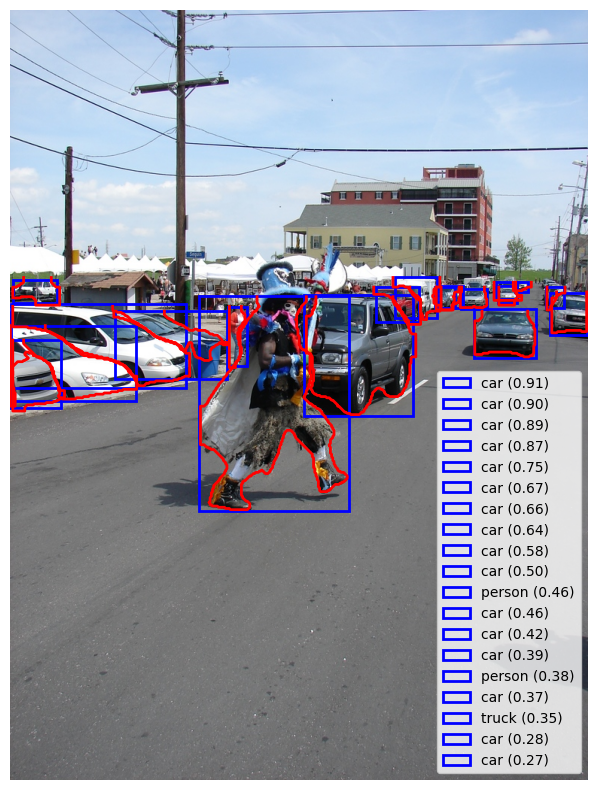

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from matplotlib.patches import Rectangle

# Load the original image
img_path = "/home/dnth/Desktop/xinfer/tests/test_data/test_image_1.jpg"
image = Image.open(img_path)

# Create figure and axis
plt.figure(figsize=(10, 10))
plt.imshow(image)

# Plot the mask
for mask in result.masks:
    mask_coords = np.array(mask.xy)
    plt.plot(mask_coords[:, 0], mask_coords[:, 1], 'r-', linewidth=2)

# Plot the bounding box
for box in result.boxes:
    # Create rectangle patch
    rect = Rectangle(
        (box.x1, box.y1),
        box.x2 - box.x1,  # width
        box.y2 - box.y1,  # height
        linewidth=2,
        edgecolor='blue',
        facecolor='none',
        label=f'{box.label} ({box.score:.2f})'
    )
    plt.gca().add_patch(rect)

plt.legend()
plt.axis('off')
plt.show()

In [ ]:
result = model.infer_batch(
    ["/home/dnth/Desktop/xinfer/tests/test_data/test_image_1.jpg", 
     "/home/dnth/Desktop/xinfer/tests/test_data/test_image_2.jpg"],
    texts=["Caption.", 
           "Is there any animal."],
)
result


In [ ]:
result[0]

In [ ]:
result[1]

In [ ]:
model.print_stats()